In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [155]:
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

train = train.drop(columns=['ID', 'Accounts Delinquent'])
test = test.drop(columns=['ID', 'Accounts Delinquent', 'Loan Status'])

In [156]:
cat_cols = [
    'Batch Enrolled',
    'Employment Duration',
    'Verification Status',
    'Payment Plan',
    'Loan Title',
    'Initial List Status',
    'Application Type',
    'Term',
    'Collection 12 months Medical'
]

num_cols = [
    'Loan Amount',
    'Funded Amount',
    'Funded Amount Investor',
    'Term',
    'Interest Rate',
    'Home Ownership',
    'Debit to Income',
    'Delinquency - two years',
    'Inquires - six months',
    'Open Account',
    'Public Record',
    'Revolving Balance',
    'Revolving Utilities',
    'Total Accounts',
    'Total Received Interest',
    'Total Received Late Fee',
    'Recoveries',
    'Collection Recovery Fee',
    'Last week Pay',
    'Total Collection Amount',
    'Total Current Balance',
    'Total Revolving Credit Limit',
    'Grade',
    'Sub Grade'
]


cube_root = [
    'Home Ownership',
    'Revolving Balance',
    'Total Current Balance',
    'Total Received Interest',
    'Interest Rate',
    'Total Revolving Credit Limit',
    'Inquires - six months',
    'Public Record',
    'Last week Pay'
]

log = [
    'Total Collection Amount',
    'Total Received Late Fee',
    'Collection Recovery Fee',
    'Recoveries',
    'Total Accounts'
]

root = [
    'Open Account',
    'Funded Amount Investor',
    'Delinquency - two years'
]


normal = [
    'Funded Amount',
    'Loan Amount',
    'Revolving Utilities',
    'Debit to Income'
]

ord_cols = ['Grade', 'Sub Grade']

# Transformations

In [157]:
train[cube_root] = np.cbrt(train[cube_root])
test[cube_root] = np.cbrt(test[cube_root])

train[log] = np.log(train[log] + 1)
test[log] = np.log(test[log] + 1)

train[root] = np.sqrt(train[root])
test[root] = np.sqrt(test[root])

In [158]:
train['Collection 12 months Medical'] = train['Collection 12 months Medical'].map({
    0: 'No',
    1: 'Yes'
})

test['Collection 12 months Medical'] = test['Collection 12 months Medical'].map({
    0: 'No',
    1: 'Yes'
})

# Heatmap

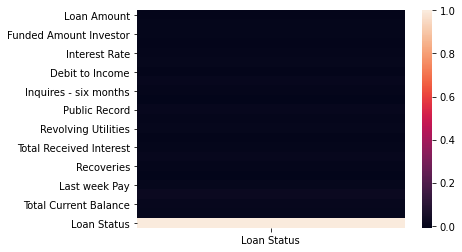

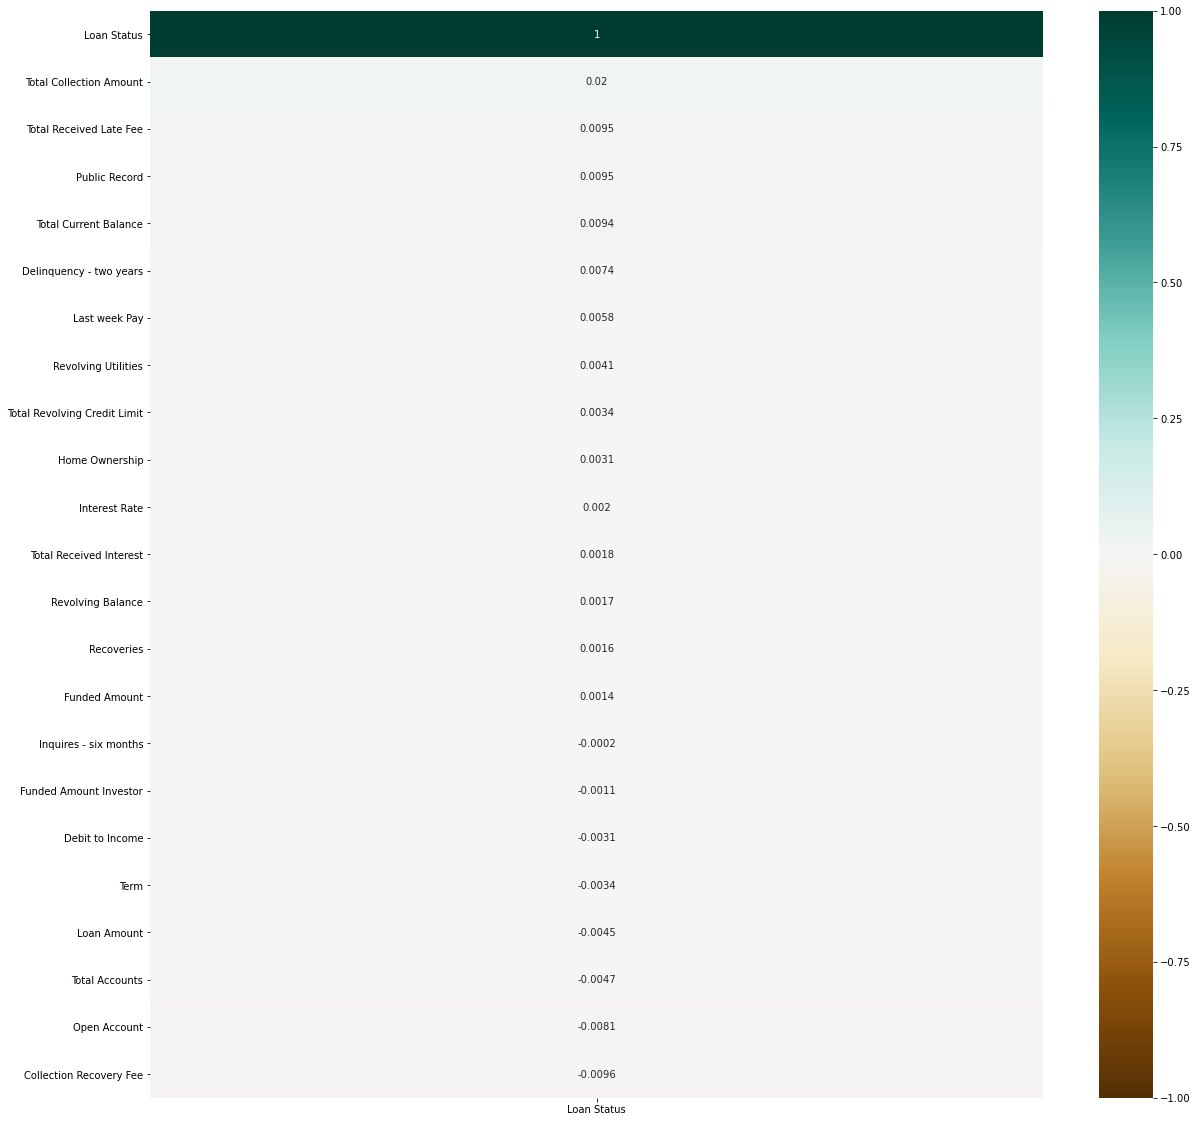

In [162]:
tester = train[train['Loan Status'] == 0]
sns.heatmap(train.corr()[['Loan Status']])

plt.figure(figsize=(20,20))
heatmap = sns.heatmap(train.corr()[['Loan Status']].sort_values(by='Loan Status', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

#### labels = np.asarray(train['Loan Status'])

train = train.drop(columns=['Loan Status'])

In [123]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

enc = OrdinalEncoder()

train[ord_cols] = enc.fit_transform(train[ord_cols])
test[ord_cols] = enc.transform(test[ord_cols])

ct = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
], remainder='passthrough', sparse_threshold=0)

trans_train = ct.fit_transform(train)
trans_test = ct.transform(test)

In [124]:
trans_train.shape

(67463, 190)

In [125]:
trans_test.shape

(28913, 190)

In [126]:
# ones = np.where(labels==1)
# zeroes = np.where(labels==0)
# zeroes = np.random.choice(zeroes[0], len(ones[0]))


# labels = np.concatenate([labels[ones], labels[zeroes]])
# trans_train = np.concatenate([trans_train[ones], trans_train[zeroes]])

# shuffler = np.random.permutation(len(trans_train))
# labels = labels[shuffler]
# trans_train = trans_train[shuffler]

In [127]:
sns.heatmap(train_trans.corr());

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('num', StandardScaler(),
                                 ['Loan Amount', 'Funded Amount',
                                  'Funded Amount Investor', 'Term',
                                  'Interest Rate', 'Home Ownership',
                                  'Debit to Income', 'Delinquency - two years',
                                  'Inquires - six months', 'Open Account',
                                  'Public Record', 'Revolving Balance',
                                  'Revolving Utilities', 'Total Accounts',
                                  'Total Received In...
                                  'Total Received Late Fee', 'Recoveries',
                                  'Collection Recovery Fee', 'Last week Pay',
                                  'Total Collection Amount',
                                  'Total Current Balance',
                                  'Total Revo

In [112]:
ct.get_params()

{'n_jobs': None,
 'remainder': 'passthrough',
 'sparse_threshold': 0,
 'transformer_weights': None,
 'transformers': [('num',
   StandardScaler(),
   ['Loan Amount',
    'Funded Amount',
    'Funded Amount Investor',
    'Term',
    'Interest Rate',
    'Home Ownership',
    'Debit to Income',
    'Delinquency - two years',
    'Inquires - six months',
    'Open Account',
    'Public Record',
    'Revolving Balance',
    'Revolving Utilities',
    'Total Accounts',
    'Total Received Interest',
    'Total Received Late Fee',
    'Recoveries',
    'Collection Recovery Fee',
    'Last week Pay',
    'Total Collection Amount',
    'Total Current Balance',
    'Total Revolving Credit Limit',
    'Grade',
    'Sub Grade']),
  ('cat',
   OneHotEncoder(handle_unknown='ignore'),
   ['Batch Enrolled',
    'Employment Duration',
    'Verification Status',
    'Payment Plan',
    'Loan Title',
    'Initial List Status',
    'Application Type',
    'Term',
    'Collection 12 months Medical'])],
 

In [116]:
for x in train.columns:
    if (x not in num_cols) & (x not in cat_cols):
        print(x)

ID
Loan Status
